=== HEAT PUMP ANALYSIS ===

Heat Pump COP: 6.59


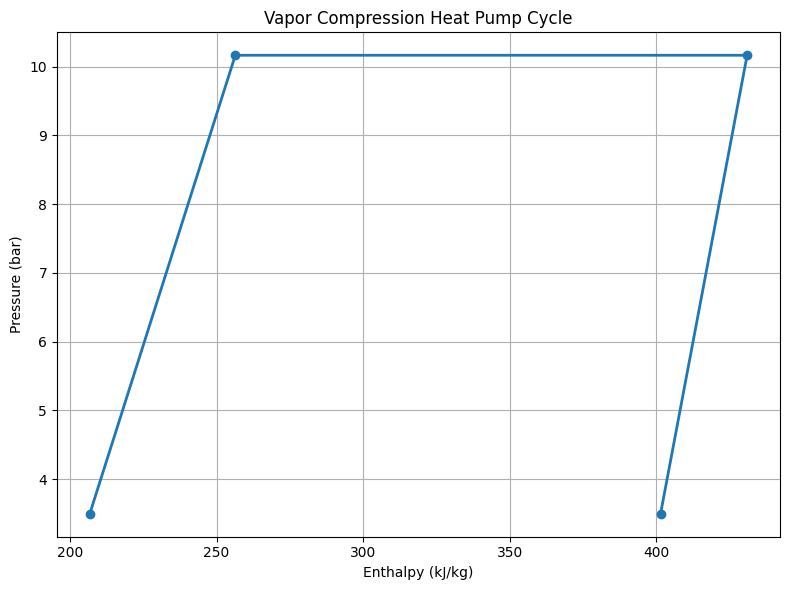

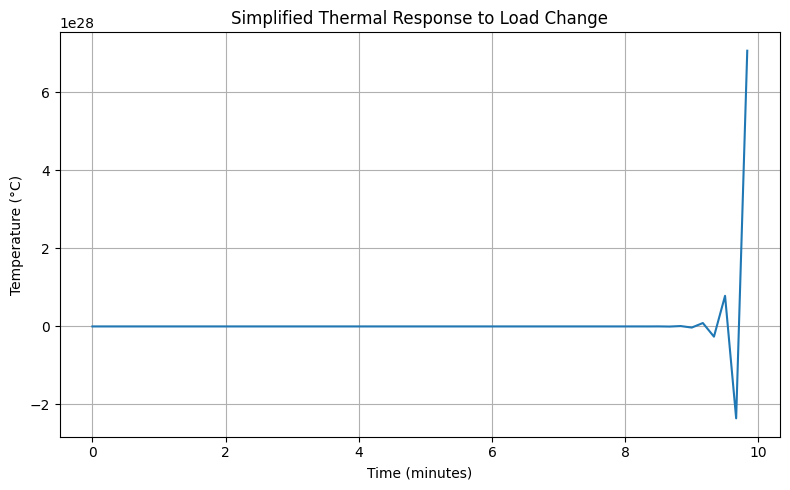


Analysis complete.


In [1]:
import CoolProp.CoolProp as CP
import numpy as np
import matplotlib.pyplot as plt

print("=== HEAT PUMP ANALYSIS ===\n")

# 1. STEADY-STATE HEAT PUMP CYCLE

T_evap = 5 + 273.15      # K
T_cond = 40 + 273.15    # K
eta_is = 0.75           # Isentropic efficiency

P_evap = CP.PropsSI('P', 'T', T_evap, 'Q', 0, 'R134a')
P_cond = CP.PropsSI('P', 'T', T_cond, 'Q', 1, 'R134a')

h1 = CP.PropsSI('H', 'T', T_evap, 'Q', 1, 'R134a')
s1 = CP.PropsSI('S', 'T', T_evap, 'Q', 1, 'R134a')
h2s = CP.PropsSI('H', 'P', P_cond, 'S', s1, 'R134a')
h2 = h1 + (h2s - h1) / eta_is
h3 = CP.PropsSI('H', 'T', T_cond, 'Q', 0, 'R134a')
h4 = CP.PropsSI('H', 'P', P_evap, 'Q', 0, 'R134a')

h = np.array([h1, h2, h3, h4]) / 1000  # kJ/kg

COP = (h[0] - h[3]) / (h[1] - h[0])
print(f"Heat Pump COP: {COP:.2f}")

# 2. p-h DIAGRAM (ENGINEERING VIEW)

p = np.array([P_evap, P_cond, P_cond, P_evap]) / 1e5  # bar

plt.figure(figsize=(8,6))
plt.plot(h, p, 'o-', linewidth=2)
plt.xlabel("Enthalpy (kJ/kg)")
plt.ylabel("Pressure (bar)")
plt.title("Vapor Compression Heat Pump Cycle")
plt.grid(True)
plt.tight_layout()
plt.savefig("hp_cycle.png", dpi=300)
plt.show()

# 3. SIMPLIFIED THERMAL RESPONSE

T_env = 5               # °C
UA = 40000              # W/K
C_th = 1e5              # J/K
Q_load = 200000         # W

dt = 10                 # seconds
time = np.arange(0, 600, dt)
T = np.zeros_like(time, dtype=float)
T[0] = T_env

for i in range(1, len(time)):
    dTdt = (Q_load - UA * (T[i-1] - T_env)) / C_th
    T[i] = T[i-1] + dTdt * dt

plt.figure(figsize=(8,5))
plt.plot(time/60, T)
plt.xlabel("Time (minutes)")
plt.ylabel("Temperature (°C)")
plt.title("Simplified Thermal Response to Load Change")
plt.grid(True)
plt.tight_layout()
plt.savefig("thermal_response.png", dpi=300)
plt.show()

print("\nAnalysis complete.")
